Clustering: K-Means 
Dataset : Social_Network_Ads.csv 
Apply Data pre-processing (Label Encoding , Data Transformation….) 
techniques if necessary. 
Apply K-Means clustering algorithms (based on EstimatedSalary 
column) to find the group of users.

In [8]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
# Load the dataset
data = pd.read_csv('Social_Network_Ads.csv')

# Preview the dataset
data.head()


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [10]:
# Check for missing values
print(data.isnull().sum())
# Drop or fill missing values if necessary
data = data.dropna()


User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64


In [11]:
# Standardize the 'EstimatedSalary' column
scaler = StandardScaler()
data['EstimatedSalary_scaled'] = scaler.fit_transform(data[['EstimatedSalary']])


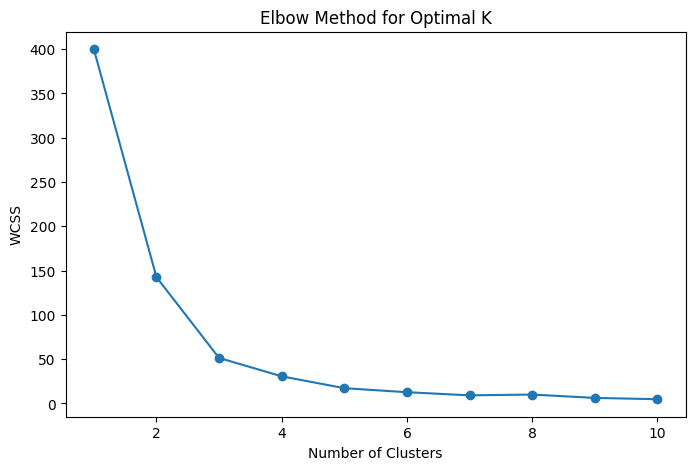

In [12]:

X = data[['EstimatedSalary_scaled']]

# Test different cluster counts
wcss = [] #within cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [13]:
# Fit K-Means with the chosen number of clusters
kmeans = KMeans(n_clusters=3, random_state=42)
data['cluster'] = kmeans.fit_predict(X)


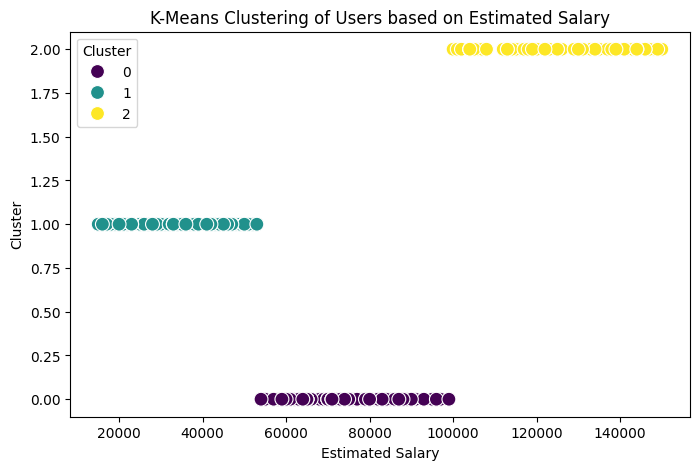

In [14]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data, x='EstimatedSalary', y='cluster', hue='cluster', palette='viridis', s=100)
plt.title("K-Means Clustering of Users based on Estimated Salary")
plt.xlabel("Estimated Salary")
plt.ylabel("Cluster")
plt.legend(title="Cluster")
plt.show()
